In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
from params_proto.neo_proto import ParamsProto


class Args(ParamsProto):
    gamma = 0.9
    lam = 0.9

    T = 20
    N = 20  # truncation for TD(λ)


def td_lambda():
    el_rewards = np.zeros(Args.T)
    el_states = np.zeros(Args.T)
    # We fix the G_t to the left side, and focus
    # on computing the target value on the right
    # hand side.
    for n in range(1, Args.N - 1):
        # 1 step:
        for t in range(0, n):
            el_rewards[t] += Args.gamma ** t * Args.lam ** (n - 1)
        el_states[n] += Args.gamma ** n * Args.lam ** (n - 1)
    return el_rewards, el_states


We can now plot the unnormalized eligibility trace. TD(0) is the same as 1-step bellman, whereas TD(1)
evenly distributes the credit across time.

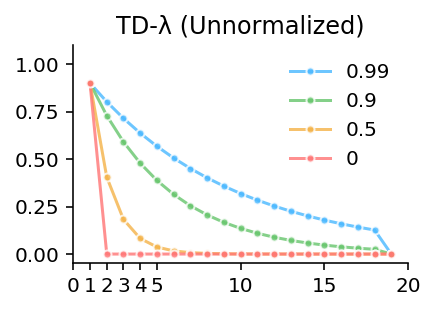

In [2]:
import matplotlib.pyplot as plt

colors = ['#49b8ff', '#66c56c', '#f4b247', '#ff7575']
xticks = [0, 1, 2, 3, 4, 5, 10, 15, 20]

plt.figure(figsize=(3, 2))
plt.title('TD-λ (Unnormalized)')
for i, Args.lam in enumerate([0.99, 0.9, 0.5, 0]):
    _, el = td_lambda()
    plt.plot(range(1, len(el)), el[1:], 'o-', markeredgecolor='white', markersize=4,
             color=colors[i % 4], alpha=0.8, label=f'{Args.lam}')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_ticks(xticks)
plt.ylim(None, 1.1)
plt.xlim(None, 20)
plt.legend(frameon=False)
plt.show()

Bellow is the normalized curves.

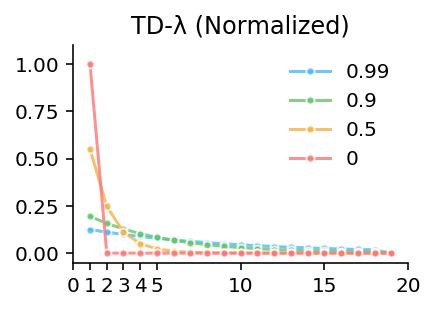

In [3]:
plt.figure(figsize=(3, 2))
plt.title('TD-λ (Normalized)')
for i, Args.lam in enumerate([0.99, 0.9, 0.5, 0]):
    _, el = td_lambda()
    plt.plot(range(1, len(el)), el[1:] / el[1:].sum(), 'o-', markeredgecolor='white',
             markersize=4, color=colors[i % 4], alpha=0.8, label=f'{Args.lam}')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_ticks(xticks)
plt.ylim(None, 1.1)
plt.xlim(None, 20)
plt.legend(frameon=False)
plt.show()

We can look at how rewards are used as well.

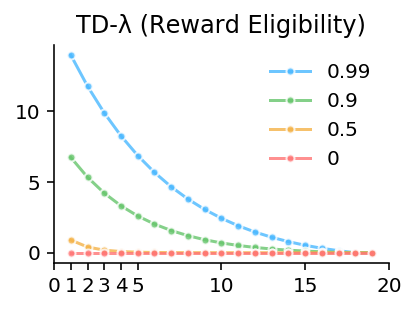

In [4]:
plt.figure(figsize=(3, 2))
plt.title('TD-λ (Reward Eligibility)')
for i, Args.lam in enumerate([0.99, 0.9, 0.5, 0]):
    el_r, _ = td_lambda()
    plt.plot(range(1, len(el_r)), el_r[1:], 'o-', markeredgecolor='white',
             markersize=4, color=colors[i % 4], alpha=0.8, label=f'{Args.lam}')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().xaxis.set_ticks(xticks)
# plt.ylim(None, 1.1)
plt.xlim(None, 20)
plt.legend(frameon=False)
plt.show()

